In [2]:
import pandas as pd

# 读取CSV文件

csv_file_path = 'D:\AI\AAAI会议论文聚类分析\Dataset\[UCI] AAAI-14 Accepted Papers - Papers.csv'
df = pd.read_csv(csv_file_path)

# 将DataFrame保存为Excel文件
excel_file_path = 'D:/AI/AAAI会议论文聚类分析/Dataset/File.xlsx'

df.to_excel(excel_file_path, index=False)

print(f'转换完成，Excel文件保存在: {excel_file_path}')


转换完成，Excel文件保存在: D:/AI/AAAI会议论文聚类分析/Dataset/File.xlsx


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[8 5 0 7 1 3 6 9 4 2]


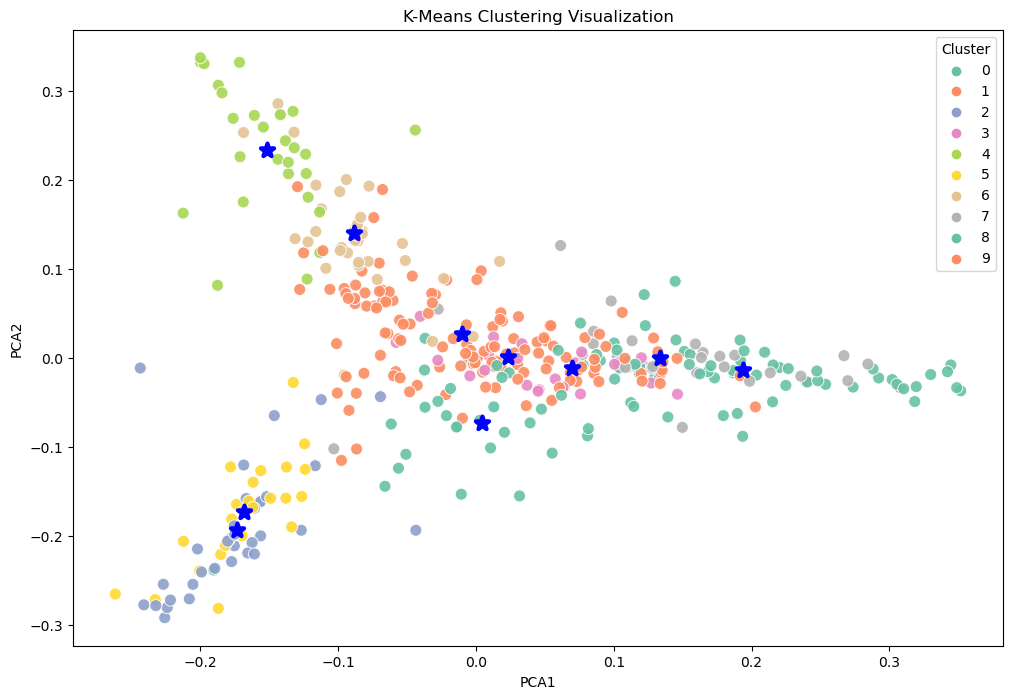

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 读取论文数据，假设有一个包含文本的CSV文件，列名为 'Title' 和 'Abstract'
csv_file_path = 'D:\AI\AAAI会议论文聚类分析\Dataset\[UCI] AAAI-14 Accepted Papers - Papers.csv'
df = pd.read_csv(csv_file_path)

# title,authors,groups,keywords,topics,abstract
# 合并 'Title' 和 'Abstract' 列以获取完整的文本
df['Full_Text'] = df['title'].astype(str) + ' '  + df['groups'].astype(str) + ' ' + df['keywords'].astype(str)+ ' ' + df['topics'].astype(str)+ ' ' + df['abstract'].astype(str)

# 使用TfidfVectorizer将文本转化为向量
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Full_Text'])

# 使用K均值聚类算法，假设我们希望聚成n个类别
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
print (df['Cluster'].unique())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# 将降维后的数据加入DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 设置画布大小
plt.figure(figsize=(12, 8))

# 使用seaborn绘制散点图，根据聚类结果着色
sns.scatterplot(x='PCA1', y='PCA2',  data=df, hue='Cluster',palette='Set2', s=75, alpha=0.9)

# 绘制聚类中心
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=100, linewidths=3, color='b')

# 添加标题和标签
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# 显示图例
plt.legend(title='Cluster')

# 显示图形
plt.show()

excel_file_path = 'D:/AI/AAAI会议论文聚类分析/Dataset/File1.xlsx'

df.to_excel(excel_file_path, index=False)

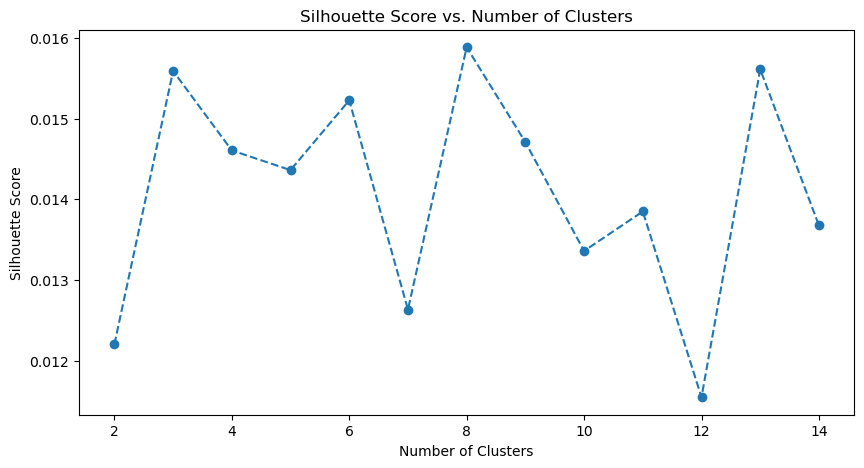

In [56]:
from sklearn.metrics import silhouette_score

# 计算轮廓系数
# silhouette_avg = silhouette_score(X, df['Cluster'])
# print(f'Silhouette Coefficient: {silhouette_avg}')

# 使用轮廓系数来鉴定模型解释力
# 轮廓系数（Silhouette Coefficient）： 轮廓系数度量了聚类的紧密度和分离度，值范围在[-1, 1]之间，越接近1表示聚类越合理。
scores = []
range_values = range(2, 15)

for i in range_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X)
    score = silhouette_score(X,  kmeans.labels_)
    scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10,5))
plt.plot(range_values, scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1 2]


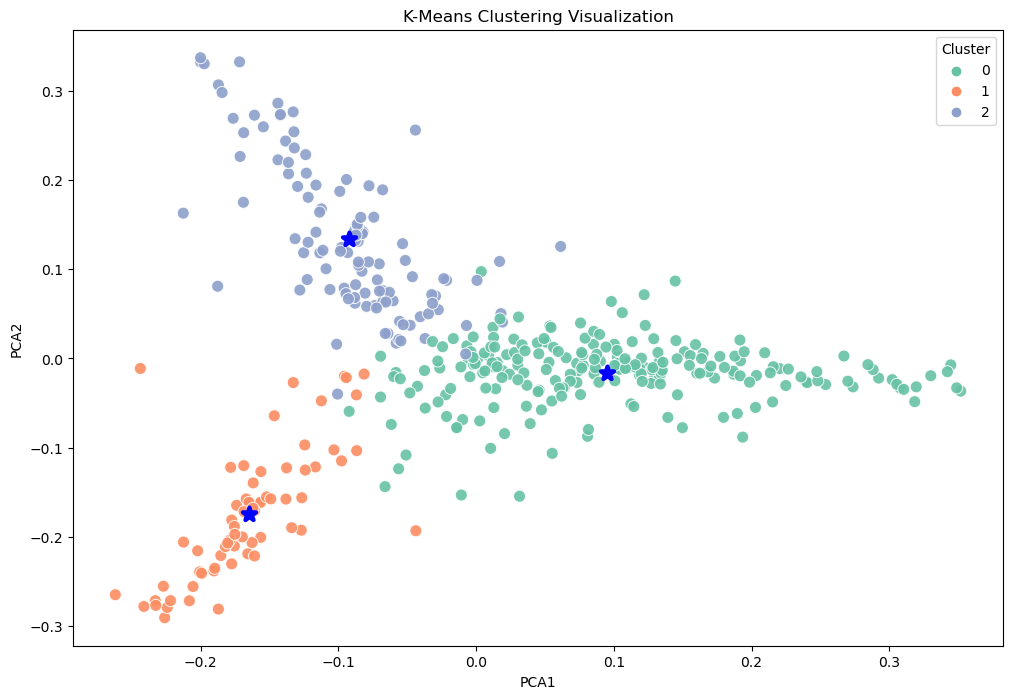

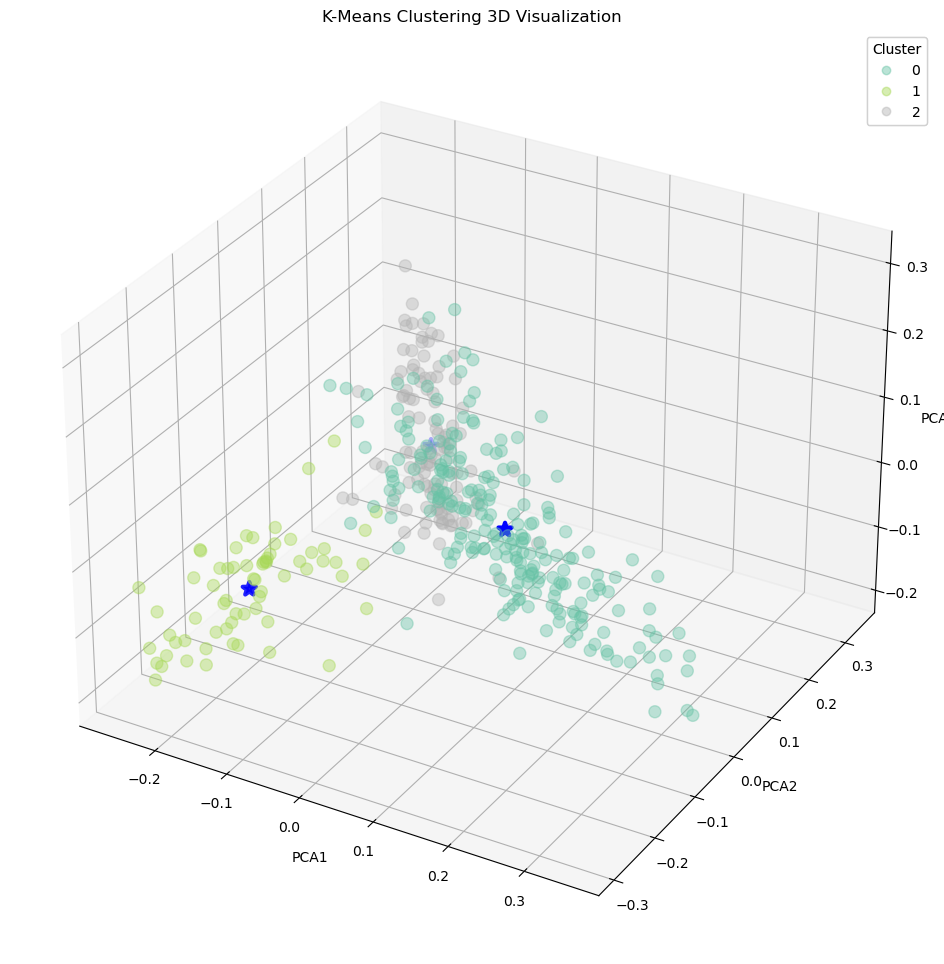

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 读取论文数据，假设有一个包含文本的CSV文件，列名为 'Title' 和 'Abstract'
csv_file_path = 'D:\AI\AAAI会议论文聚类分析\Dataset\[UCI] AAAI-14 Accepted Papers - Papers.csv'
df = pd.read_csv(csv_file_path)

# title,authors,groups,keywords,topics,abstract
# 合并 'Title' 和 'Abstract' 列以获取完整的文本
df['Full_Text'] = df['title'].astype(str) + ' '  + df['groups'].astype(str) + ' ' + df['keywords'].astype(str)+ ' ' + df['topics'].astype(str)+ ' ' + df['abstract'].astype(str)

# 使用TfidfVectorizer将文本转化为向量
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Full_Text'])

# 使用K均值聚类算法，假设我们希望聚成n个类别
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
print (df['Cluster'].unique())

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# 将降维后的数据加入DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2]
# 设置画布大小
plt.figure(figsize=(12, 8))
# 使用seaborn绘制散点图，根据聚类结果着色
sns.scatterplot(x='PCA1', y='PCA2',  data=df, hue='Cluster',palette='Set2', s=75, alpha=0.9)
# 绘制聚类中心
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=100, linewidths=3, color='b')
# 添加标题和标签
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
# 显示图例
plt.legend(title='Cluster')
# 显示图形
plt.show()





# 设置画布大小
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')  # 添加3D坐标轴
# 使用seaborn绘制散点图，根据聚类结果着色
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['Cluster'], cmap='Set2', s=75, alpha=0.4)
# 绘制聚类中心
centers = pca.transform(kmeans.cluster_centers_)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='*', s=100, linewidths=3, color='b')
# 添加标题和标签
ax.set_title('K-Means Clustering 3D Visualization')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
# 添加图例
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)
# 显示图形
plt.show()